In [1]:
%run ../setup.ipynb

In [2]:
x = np.array([1, 0, -1, 0, 1, 0])

In [3]:
n = np.arange(len(x))

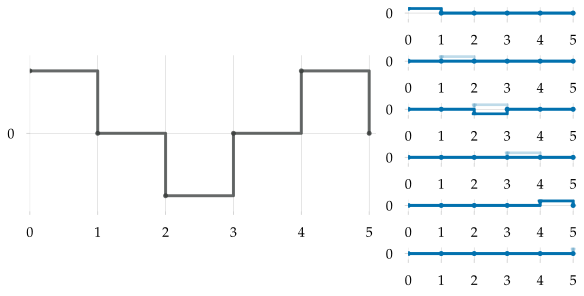

In [4]:
fig = plt.figure(constrained_layout=True, figsize=figaspect(0.5))

axd = fig.subplot_mosaic(
"""
..0
LL1
LL2
LL3
LL4
..5
"""
)

def delay(d, N):
    sig = np.zeros(N)
    sig[d] = 1
    return sig

N = len(x)

axd['L'].step(n, x, where='post', marker='.', alpha=0.75, color=colors[3])
axd['0'].step(n, delay(0, N), where='post',marker='.', color=colors[0], alpha=0.25)
axd['0'].step(n, delay(0, N) * x[0], where='post',marker='.', color=colors[0])
axd['1'].step(n, delay(1, N), where='post',marker='.', color=colors[0], alpha=0.25)
axd['1'].step(n, delay(1, N) * x[1], where='post',marker='.', color=colors[0])
axd['2'].step(n, delay(2, N), where='post',marker='.', color=colors[0], alpha=0.25)
axd['2'].step(n, delay(2, N) * x[2], where='post',marker='.', color=colors[0])
axd['3'].step(n, delay(3, N), where='post',marker='.', color=colors[0], alpha=0.25)
axd['3'].step(n, delay(3, N) * x[3], where='post',marker='.', color=colors[0])
axd['4'].step(n, delay(4, N), where='post',marker='.', color=colors[0], alpha=0.25)
axd['4'].step(n, delay(4, N) * x[4], where='post',marker='.', color=colors[0])
axd['5'].step(n, delay(5, N), where='post',marker='.', color=colors[0], alpha=0.25)
axd['5'].step(n, delay(5, N) * x[5], where='post',marker='.', color=colors[0])
for k, ax in axd.items():
    ax.set(xlim=[0, N -1 +.1], ylim=[x.min()-0.25, x.max() + 0.25], yticks=[0], xticks=n)

In [5]:
X = np.fft.fft(x)
xmag = np.abs(X)
xang = np.angle(X)

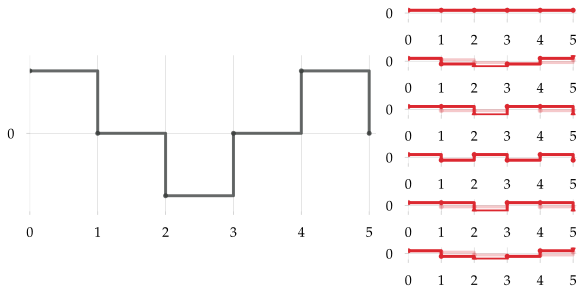

In [8]:
fig = plt.figure(constrained_layout=True, figsize=figaspect(0.5))


axd = fig.subplot_mosaic(
"""
..0
LL1
LL2
LL3
LL4
..5
"""
)

def wave(phase, m, N):
    return np.cos(2 * np.pi * m * np.arange(N) / N + phase)
    
N = len(x)


axd['L'].step(n, x, where='post', marker='.', alpha=0.75, color=colors[3])
axd['0'].step(n, wave(0, 0, N), where='post',marker='.', color=colors[1], alpha=0.25)
axd['0'].step(n, wave(xang[0], 0, N) * xmag[0], where='post',marker='.', color=colors[1])

axd['1'].step(n, wave(0, 1, N), where='post',marker='.', color=colors[1], alpha=0.25)
axd['1'].step(n, wave(xang[1], 1, N) * xmag[1], where='post',marker='.', color=colors[1])

axd['2'].step(n, wave(0, 2, N), where='post',marker='.', color=colors[1], alpha=0.25)
axd['2'].step(n, wave(xang[2], 2, N) * xmag[2], where='post',marker='.', color=colors[1])

axd['3'].step(n, wave(0, 3, N), where='post',marker='.', color=colors[1], alpha=0.25)
axd['3'].step(n, wave(xang[3], 3, N) * xmag[3], where='post',marker='.', color=colors[1])

axd['4'].step(n, wave(0, 4, N), where='post',marker='.', color=colors[1], alpha=0.25)
axd['4'].step(n, wave(xang[4], 4, N) * xmag[4], where='post',marker='.', color=colors[1])

axd['5'].step(n, wave(0, 5, N), where='post',marker='.', color=colors[1], alpha=0.25)
axd['5'].step(n, wave(xang[5], 5, N) * xmag[5], where='post',marker='.', color=colors[1])

axd['L'].set(xlim=[0, N -1 +.1], ylim=[x.min()-0.25, x.max() + 0.25], yticks=[0], xticks=n)
for k in '012345':
    axd[k].set(xlim=[0, N -1 +.1],
           ylim=[-xmag.max()-0.1, xmag.max()+ 0.1],
           yticks=[0], xticks=n)